# EV Impact & Deployment scenarios, Demand & Charging Infrastructure, Oil Displacement and Emissions Reduction

Electric vehicles (EVs) are playing an increasingly important role in reducing emissions from the transportation sector. In order to meet the growing demand for EVs, it is essential to plan for an increase in electricity supply from renewable sources.

**Impact of EVs on Electricity Demand:** The increased electricity demand from EVs will need to be met by clean energy sources such as solar and wind power. This presents an opportunity to expand renewable energy generation and reduce reliance on fossil fuels.

**Battery Demand and Charging Infrastructure:** The widespread adoption of EVs will necessitate a significant increase in battery production. Additionally, a robust charging infrastructure will be needed to support EVs on the road. Governments and private companies are investing in charging infrastructure, but more needs to be done to ensure that charging is convenient and accessible for all EV drivers.

**Oil Displacement and Emissions Reduction:** As more EVs are sold, the demand for oil will decline. This will lead to a reduction in greenhouse gas emissions from the transportation sector. EVs also produce zero tailpipe emissions, which will further improve air quality. In addition, a shift to renewable energy sources is facilitated.

**Scenarios for EV Deployment:** The International Energy Agency (IEA) has developed several scenarios for EV deployment, which take into account factors such as government policies, technology advancements, and consumer preferences. These scenarios show that significant growth in EV sales is possible in the coming decades.

Overall, the transition to electric vehicles is a complex challenge, but it is essential for meeting climate change targets. By planning for increased electricity supply from renewable sources, investing in charging infrastructure, and developing policies that support EV adoption, governments and businesses can help to ensure a smooth transition to a low-carbon transportation system.

**The study period is the 1/1/2022 to 31/12/2023**

**References**

https://www.iea.org/energy-system/transport/electric-vehicles#tracking


## Victoria Energy Demand Proile

This work focusses on the locaised region of Victoria Energy Demand to better understand the dynamics of EV Impact & Deployment scenarios, Demand & Charging Infrastructure, Oil Displacement and Emissions Reduction.

it is important for electricity generators to understand the changing dynamics of the electricity demand.

The Data is sourced from the following link:

https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data



In [13]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
#from features_preprocessing import transform_to_windows, rename_cols

In [67]:
!ls

Energy_Demand  Energy_Demand.tar.gz  sample_data


In [66]:
!tar -xzvf Energy_Demand.tar.gz

Energy_Demand/
Energy_Demand/PRICE_AND_DEMAND_202201_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202202_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202203_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202204_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202205_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202206_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202207_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202208_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202209_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202210_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202211_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202212_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202301_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202302_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202303_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202304_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202305_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202306_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202307_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202308_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202309_VIC1.cs

In [68]:
import pandas as pd
import glob

# Get a list of all CSV files in a directory
csv_files = glob.glob('/content/Energy_Demand/*.csv')

In [69]:
# Create an empty dataframe to store the combined data
combined_df = pd.DataFrame()

In [70]:
# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    combined_df = pd.concat([combined_df, df])

In [71]:
loaded_energy_data = combined_df.copy()

In [72]:
# Convert the 'datetime_column' to a datetime data type
loaded_energy_data['SETTLEMENTDATE'] = pd.to_datetime(loaded_energy_data['SETTLEMENTDATE'], format='mixed') # Changed the format string to match the date format in the data

In [73]:
loaded_energy_data.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2023-04-01 00:05:00,4193.63,121.33,TRADE
1,VIC1,2023-04-01 00:10:00,4200.09,135.98,TRADE
2,VIC1,2023-04-01 00:15:00,4123.02,121.39,TRADE
3,VIC1,2023-04-01 00:20:00,4121.39,125.86,TRADE
4,VIC1,2023-04-01 00:25:00,4100.24,120.37,TRADE


In [74]:
# Remove column name 'A'
loaded_energy_data.drop(['PERIODTYPE','REGION','RRP'], axis=1,inplace=True)
loaded_energy_data.head()

,SETTLEMENTDATE,TOTALDEMAND
0,2023-04-01 00:05:00,4193.63
1,2023-04-01 00:10:00,4200.09
2,2023-04-01 00:15:00,4123.02
3,2023-04-01 00:20:00,4121.39
4,2023-04-01 00:25:00,4100.24


In [75]:
loaded_energy_data.rename(columns = {'SETTLEMENTDATE':'time', 'TOTALDEMAND':'actual_load'}, inplace = True)
loaded_energy_data.head()

,time,actual_load
0,2023-04-01 00:05:00,4193.63
1,2023-04-01 00:10:00,4200.09
2,2023-04-01 00:15:00,4123.02
3,2023-04-01 00:20:00,4121.39
4,2023-04-01 00:25:00,4100.24


In [76]:
energy_data = loaded_energy_data.copy()

In [77]:
# setting first name as index column
energy_data.set_index("time", inplace = True)
energy_data.head()

,actual_load
time,
2023-04-01 00:05:00,4193.63
2023-04-01 00:10:00,4200.09
2023-04-01 00:15:00,4123.02
2023-04-01 00:20:00,4121.39
2023-04-01 00:25:00,4100.24


In [78]:
# Check for Null values
# print(energy_data.isnull())

# Creating a boolean series marking True for NaN values in the "actual_load" column
bool_series = pd.isnull(energy_data["actual_load"])

# Counting missing values in the "Team" column
missing_values_count = bool_series.sum()

# Displaying data only with "actual_load" values as NaN
filtered_data = energy_data[bool_series]

print("Count of missing values in the 'actual_load' column:", missing_values_count)

Count of missing values in the 'actual_load' column: 0


In [79]:
# Check for Nan values
#print(energy_data.isna())

# Creating a boolean series marking True for NaN values in the "actual_load" column
bool_series2 = pd.isna(energy_data["actual_load"])

# Counting nan values in the "actual_load" column
nan_values_count = bool_series2.sum()

# Displaying data only with "actual_load" values as NaN
filtered_data = energy_data[bool_series2]

print("Count of nan values in the 'actual_load' column:", nan_values_count)

Count of nan values in the 'actual_load' column: 0


In [80]:
#statistical profile of loads
energy_data.describe()

,actual_load
count,210240.000000
mean,4742.516328
std,964.312541
min,1456.400000
25%,4085.087500
50%,4627.800000
75%,5319.142500
max,8949.370000


Described above are the statisical properties of the electricity demand over the period of interest.

Delving into the electricity demand and its dynamics, especially in the context of transitioning to renewable energy sources and the part played by electric Vehicles. The following factors for electricity generation are important:

- Mean Demand
- Maximum Demand
- Minimum Demand
- Standard Deviation


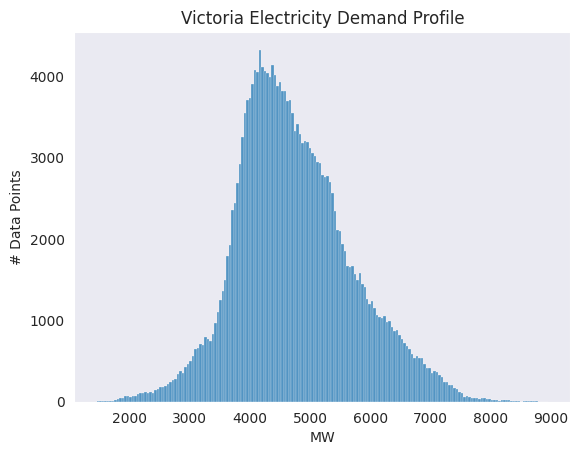

In [81]:
#visualize the distributions
sns.histplot(energy_data['actual_load'], kde=False).set(title='Victoria Electricity Demand Profile', xlabel='MW', ylabel='# Data Points')

plt.show()

The actual energy demand profile follows a standard dsitribution, however it is positively skewed.

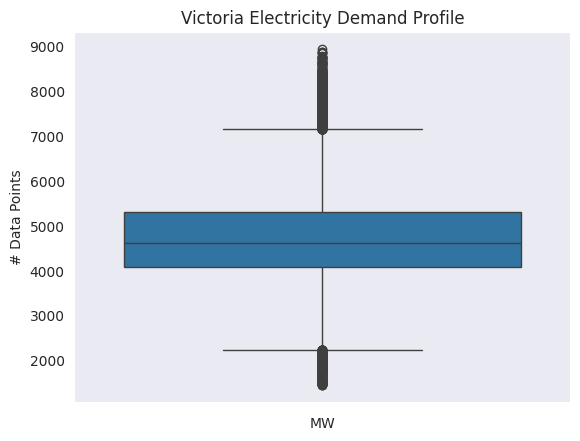

In [82]:
#visualize the distributions
sns.boxplot(energy_data['actual_load']).set(title='Victoria Electricity Demand Profile', xlabel='MW', ylabel='# Data Points')

plt.show()

The variability in the distributions is consistent in terms of the IQRs and median values.

There are outliers as would be expected (an outlier in energy distribution would be excess of demand, both resulting in grid imbalance and high risk of downtime. This also capture the positive skew of the distribution.

Possible explanations for the outliers in terms of demand are excessive climate warming events due to global warming, like excessive heating or cooling events.

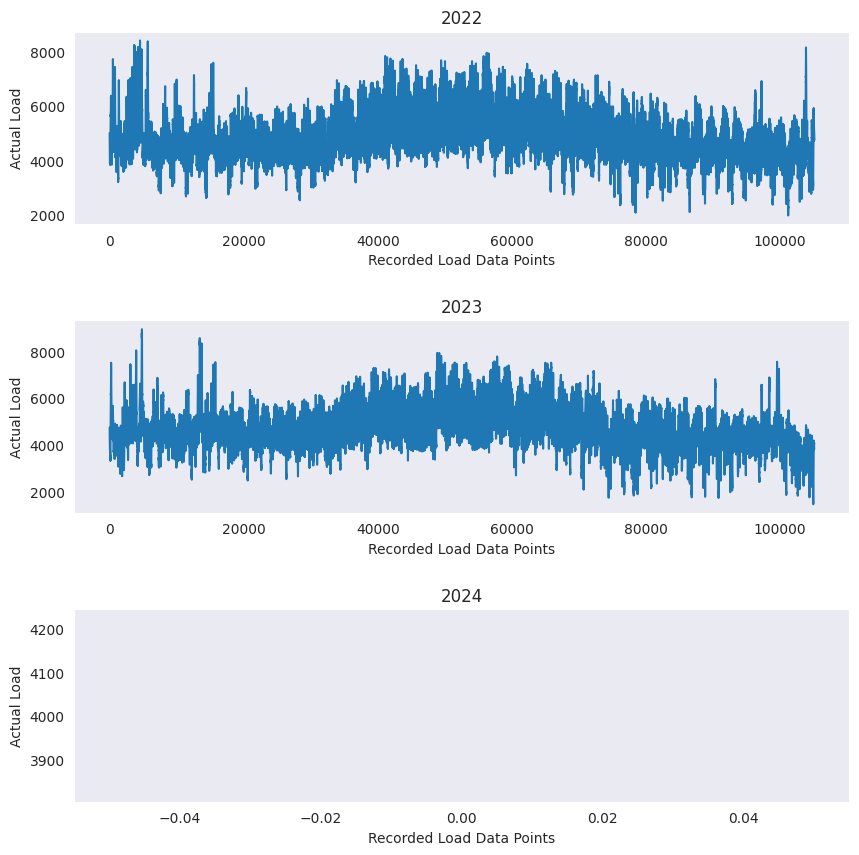

In [112]:
##### Plot the yearly actual loads

#group data by year
groups = energy_data['actual_load'].groupby(pd.Grouper(freq='A'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(10,10))


for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Recorded Load Data Points')
    ax.set_ylabel('Actual Load')
    ax.set_title(name.year)
    plt.subplots_adjust(hspace=0.5)

Both 2022 and 2023 exhibit similiar seasonal trends.

### Demand Variability

##### Monthly demand variability

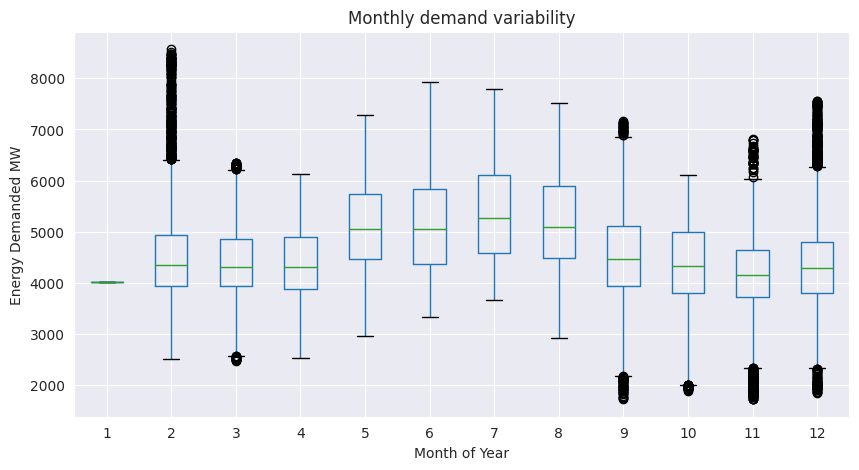

In [119]:
### plot the monthly demand variability. Looking for seasonal effects

fig, axs = plt.subplots(1, 1, figsize=(10,5))

for col in energy_data.columns:
    groups = energy_data[col].groupby(pd.Grouper(freq='M'))

    df = pd.DataFrame()

    for name, group in groups:
        df[name.month] = pd.Series(group.values)

    df.boxplot(ax=axs)
    axs.set_xlabel('Month of Year')
    axs.set_ylabel('Energy Demanded MW')
    axs.set_title('Monthly demand variability')
    #plt.subplots_adjust(hspace=0.5)


plt.show()

Actual loads shows clear seasonal trends through the year. The median actual load is highest in winter months 5, 6,7,8. This repreents a stable and predictable energy generations scenario.

However, it is also worth observing that both the outliers and the maximium variations are predominatly in the summer months, most likely due to warm weather events.
This repreents a more unstable and unpredictable energy generations scenario.



##### Weekday demand variability

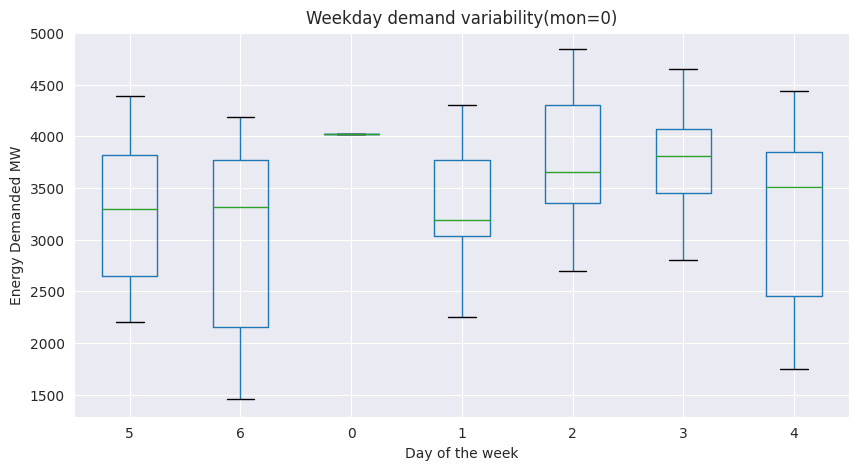

In [118]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))

for col in energy_data.columns:

    groups = energy_data[col].groupby(pd.Grouper(freq='D'))

    df = pd.DataFrame()

    for name, group in groups:
        df[name.dayofweek] = pd.Series(group.values)

    df.boxplot(ax=axs)
    axs.set_xlabel('Day of the week')
    axs.set_ylabel('Energy Demanded MW')
    axs.set_title('Weekday demand variability(mon=0)')
    #plt.subplots_adjust(hspace=0.5)


plt.show()

Days of the week show that days 5 and 6 have lower overall consumption. This is expected because in general businesses are not operating.

### Load Profile and Shape
The mean load profile is our target for predicting.

##### Mean yearly load profile


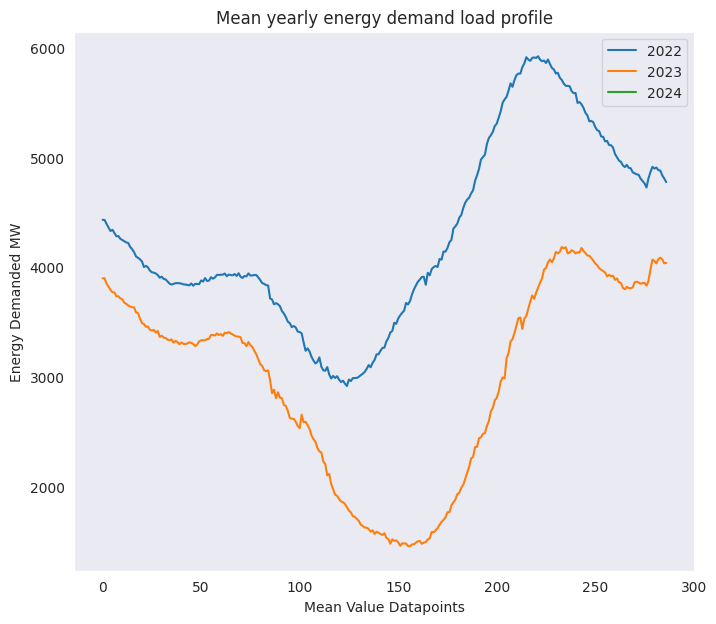

In [122]:
group_hours = energy_data['actual_load'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(8,7))

df = pd.DataFrame()

for name, group in group_hours:
    df[name.year] = pd.Series(group.values)

df.plot(ax=axs)
axs.set_xlabel('Mean Value Datapoints')
axs.set_ylabel('Energy Demanded MW')
axs.set_title('Mean yearly energy demand load profile');


We observe that the energy consumption was higher for 2022.

##### Monthly mean load profile

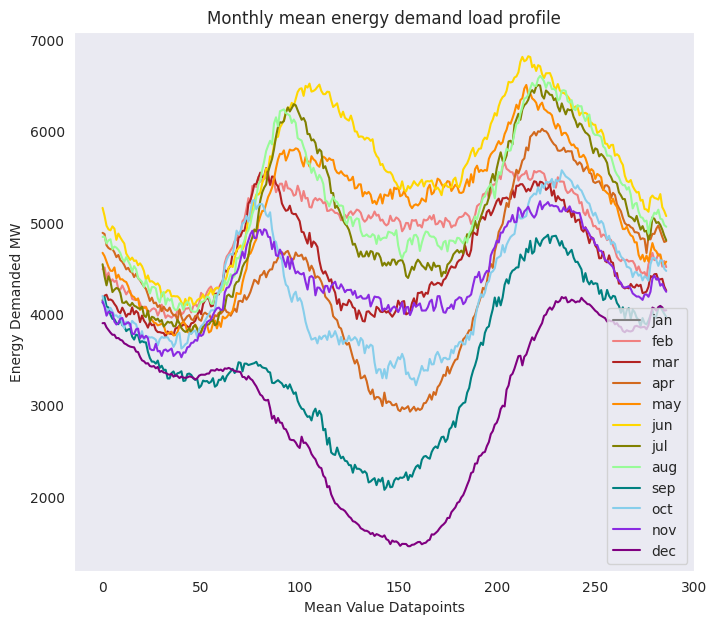

In [123]:
group_hours = energy_data['actual_load'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(8,7))

df = pd.DataFrame()

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

for name, group in group_hours:
    df[name.month] = pd.Series(group.values)


colors = ['gray', 'lightcoral', 'firebrick', 'chocolate', 'darkorange', 'gold', 'olive', 'palegreen', 'teal', 'skyblue', 'blueviolet', 'purple']
df.columns = months
df.plot(ax=axs, color=colors)
axs.set_xlabel('Mean Value Datapoints')
axs.set_ylabel('Energy Demanded MW')
axs.set_title('Monthly mean energy demand load profile');


Mean energy load profile by month show a clear difference in seasonal profile. The winter months of may, june jul, aug, oct, nov are on average seeing higher baseloads, and higher sustained load during peak hours.

The summer months of oct, nov, dec and jan have comparably lower.

##### Weekday average load

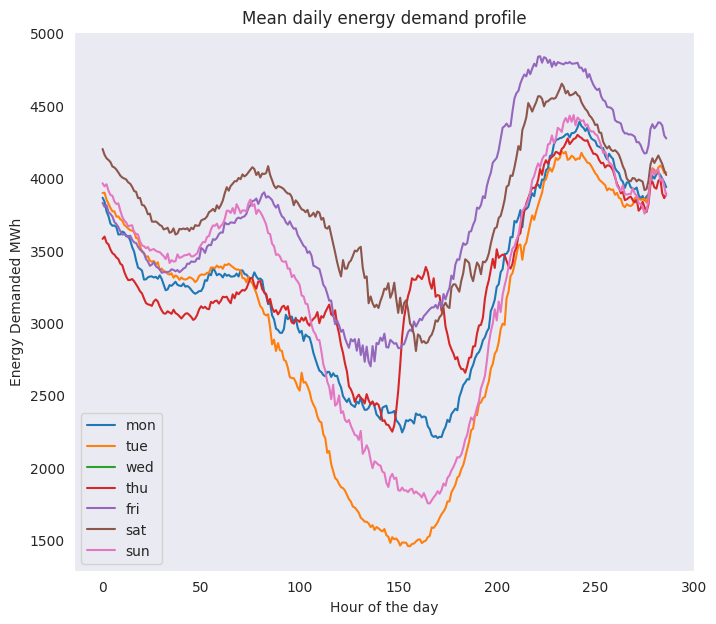

In [90]:
group_hours = energy_data['actual_load'].groupby(pd.Grouper(freq='D', how='mean'))

day_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

fig, axs = plt.subplots(1,1, figsize=(8,7))

df = pd.DataFrame()

for name, group in group_hours:
    df[name.dayofweek] = pd.Series(group.values)

df.columns = day_names
df.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean daily energy demand profile');

##### Ad fuller test for stationary

The ad fuller test is a hypothesis test for timeseries stationarity. In this case we will test on the daily mean energy demanded.

***Null Hypothesis***: The dataset is non-stationary and therefore differencing must be carried out.

If p-value is < 0.05 (two tailed test), we reject the null and assume that the time series is stationary.


In [126]:
!pip install statsmodels
import statsmodels.api as sm
import pandas as pd

energy_daily = energy_data.groupby(pd.Grouper(freq='d'))['actual_load'].mean()

# Drop NaN values
energy_daily = energy_daily.dropna()

# Calculate the maximum allowed lag based on the number of observations
maxlag = int(len(energy_daily) / 2 - 2)  # Ensure maxlag is calculated AFTER dropping NaN values

t = sm.tsa.adfuller(energy_daily, maxlag=maxlag)
print(pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags','Observations']))

Test Statistic     -3.57437
p-value             0.00627
#Lags             358.00000
Observations      362.00000
dtype: float64


Therefore we reject the null on the basis of a p-value <0.05. This means that as a whole the time series is stationary and ***does not*** need to be differenced.

## Weekday Profile of Commuter car charging profile

The following dataset sources can be used to derive and approximate Charging weekly profile correlated to commuter traffic patterns.

Commuter data-time charging add to the peak daytime demand.

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NFPQLW

https://github.com/awais345/Ev_Charging_Stations/blob/master/station_data_dataverse.csv

https://agdatashop.csiro.au

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC11209004/


In [134]:
# load alternative files
#load the energy data
loaded_charging_data = pd.read_csv('/content/station_data_dataverse.csv')
loaded_charging_data.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [135]:
loaded_charging_data['weekday'].unique()


array(['Tue', 'Wed', 'Fri', 'Thu', 'Mon', 'Sat', 'Sun'], dtype=object)

In [136]:
#add a column for calculate power KW
# Creating a new column 'C' derived from 'A' and 'B'
charging_data = pd.DataFrame() # Create an empty DataFrame
charging_data['kwhTotal'] = loaded_charging_data['kwhTotal']
charging_data['chargeTimeHrs'] = loaded_charging_data['chargeTimeHrs']
charging_data['weekday'] = loaded_charging_data['weekday']
charging_data['KWdelivered'] = charging_data['kwhTotal']/charging_data['chargeTimeHrs']
charging_data.head()


,kwhTotal,chargeTimeHrs,weekday,KWdelivered
0,7.78,1.510556,Tue,5.150423
1,9.74,2.177222,Wed,4.473590
2,6.76,4.671667,Fri,1.447021
3,6.17,1.768333,Wed,3.489161
4,0.93,0.298611,Thu,3.114419


In [137]:
# Remove column name 'A'
charging_data.drop(['kwhTotal','chargeTimeHrs'], axis=1,inplace=True)
charging_data.head()

,weekday,KWdelivered
0,Tue,5.150423
1,Wed,4.473590
2,Fri,1.447021
3,Wed,3.489161
4,Thu,3.114419


In [144]:
#statistical profile of loads
charging_data['KWdelivered'].describe()

,KWdelivered
count,3395.000000
mean,2.225018
std,1.472084
min,0.000000
25%,1.603622
50%,2.113607
75%,2.745889
max,45.957447


<ipython-input-147-5a217355d529>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(charging_data, x='KWdelivered', y='weekday', inner='box', palette='Dark2')


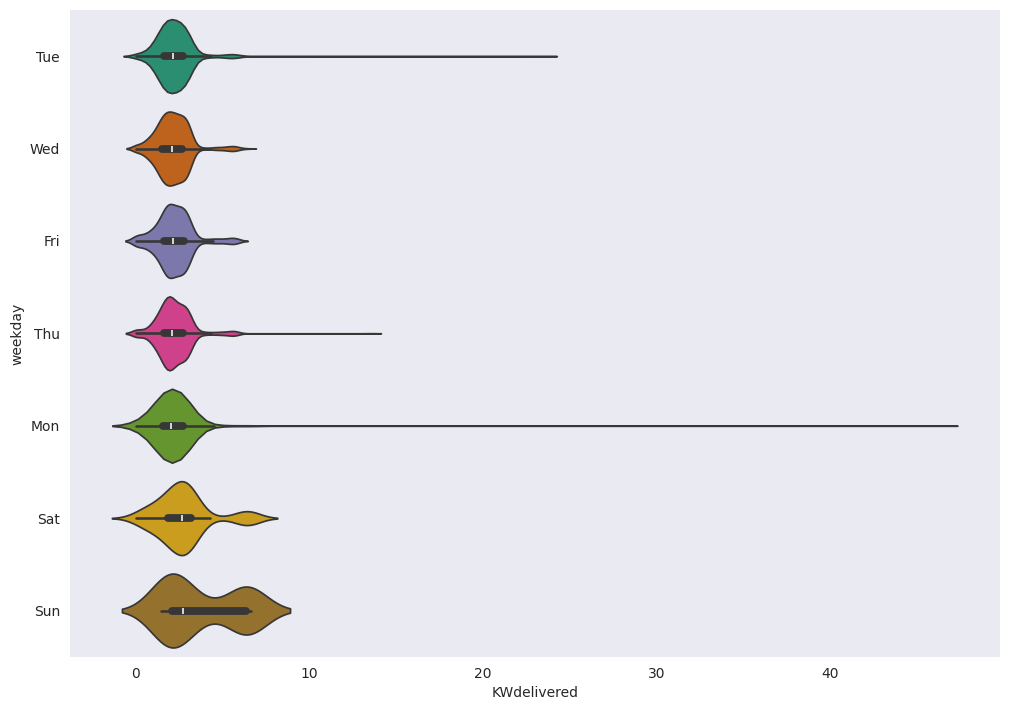

In [147]:
# @title weekday vs KWdelivered

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(charging_data['weekday'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(charging_data, x='KWdelivered', y='weekday', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The mean suggests that commuter charging, is perhaps a small top-up charge of 2.22KW.

Howver, the greatest outliers in terms of peak charging occurrs on Mon, Turesday and Wed.

### Summary of KW delivered as an inidcation of communter charge facilities.
it is important to understand the KW delivered from an electricity generation perspective per weekday.

MinMax scaling is applied to normalisation the values.

In [149]:
# Perform an operation on the grouped data (sum the 'value' column)
charging_data_profile = charging_data.groupby('weekday').sum().reset_index()

# Print the result
#print(energy_data_profile)

from sklearn.preprocessing import MinMaxScaler
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
charging_data_profile[["KWdelivered"]] = scaler.fit_transform(charging_data_profile[["KWdelivered"]])
charging_data_profile.head(10)

,weekday,KWdelivered
0,Fri,0.825884
1,Mon,0.835040
2,Sat,0.052208
3,Sun,0.000000
4,Thu,1.000000
5,Tue,0.873374
6,Wed,0.936421


In [150]:
charging_data_profile.at[1, 'weekday'] = 0
charging_data_profile.at[5, 'weekday'] = 1
charging_data_profile.at[6, 'weekday'] = 2
charging_data_profile.at[4, 'weekday'] = 3
charging_data_profile.at[0, 'weekday'] = 4
charging_data_profile.at[2, 'weekday'] = 5
charging_data_profile.at[3, 'weekday'] = 6

In [153]:
charging_data_profile.head(10)

,weekday,KWdelivered
0,4,0.825884
1,0,0.835040
2,5,0.052208
3,6,0.000000
4,3,1.000000
5,1,0.873374
6,2,0.936421


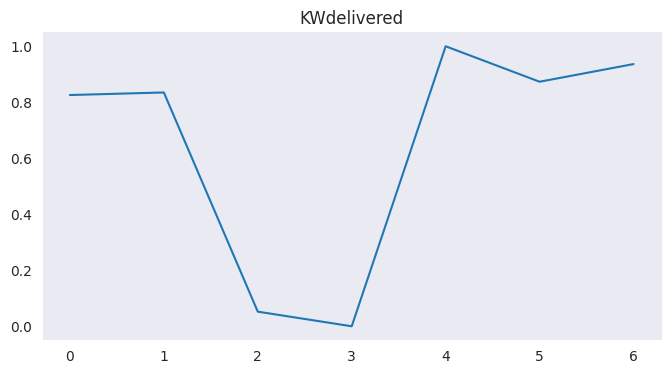

In [152]:
from matplotlib import pyplot as plt
_df_2['KWdelivered'].plot(kind='line', figsize=(8, 4), title='KWdelivered')
plt.gca().spines[['top', 'right']].set_visible(False)

The plot suggest that the minimum total charge is delievered on days 2 & 3 overall.

This could represent EV charge vacancies mid week.

## Electricity Energy Demand preprocessing to Daily

In [331]:
loaded_energy_data.head()

,time,actual_load
0,2023-04-01 00:05:00,4193.63
1,2023-04-01 00:10:00,4200.09
2,2023-04-01 00:15:00,4123.02
3,2023-04-01 00:20:00,4121.39
4,2023-04-01 00:25:00,4100.24


In [332]:
print(loaded_energy_data.columns)

Index(['time', 'actual_load'], dtype='object')


In [333]:
# Group the DataFrame by date and time using daily frequency
grouped_data = loaded_energy_data.groupby(pd.Grouper(key='time', freq='D'),observed = True)
grouped_data.head(10)

,time,actual_load
0,2022-01-01 00:05:00,5005.34
1,2022-01-01 00:10:00,4979.22
2,2022-01-01 00:15:00,4935.92
3,2022-01-01 00:20:00,4878.54
4,2022-01-01 00:25:00,4834.30
...,...,...
8645,2023-12-31 00:30:00,3770.15
8646,2023-12-31 00:35:00,3733.83
8647,2023-12-31 00:40:00,3735.22
8648,2023-12-31 00:45:00,3715.57


In [335]:
# Perform an operation on the grouped data (sum the 'value' column)
energy_data_profile = grouped_data['actual_load'].mean().reset_index()
#energy_data_profile = grouped_data['actual_load'].mean()

# Print the result
#print(energy_data_profile)
#energy_data_profile.head()

## Dependence on Weather Features & Climate features

Weather for the study period for Melbourne can be downloaded from
https://www.ncei.noaa.gov/


In [356]:
# load alternative files
#load the energy data
loaded_weather_data = pd.read_csv('weather_data.csv')
loaded_weather_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,ASN00086282,"MELBOURNE AIRPORT, AS",-37.6655,144.8321,113.4,1/01/2022,0.0,",,a",26.3,"H,,S",38.4,",,a",18.2,",,a"
1,ASN00086282,"MELBOURNE AIRPORT, AS",-37.6655,144.8321,113.4,2/01/2022,0.0,",,a",20.9,"H,,S",32.6,",,a",19.9,",,a"
2,ASN00086282,"MELBOURNE AIRPORT, AS",-37.6655,144.8321,113.4,3/01/2022,0.0,",,a",17.3,"H,,S",21.8,",,a",15.3,",,a"
3,ASN00086282,"MELBOURNE AIRPORT, AS",-37.6655,144.8321,113.4,4/01/2022,0.0,",,a",19.6,"H,,S",22.9,",,a",14.5,",,a"
4,ASN00086282,"MELBOURNE AIRPORT, AS",-37.6655,144.8321,113.4,5/01/2022,0.0,",,a",22.2,"H,,S",30.1,",,a",15.8,",,a"


In [357]:
# Convert the 'datetime_column' to a datetime data type
loaded_weather_data['DATE'] = pd.to_datetime(loaded_weather_data['DATE'], format='%d/%m/%Y') # Changed the format string to match the date format in the data

In [358]:
# Remove columns
loaded_weather_data.drop(['STATION','NAME','LATITUDE','LONGITUDE','ELEVATION','PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES'], axis=1,inplace=True)
loaded_weather_data.head()

,DATE,PRCP,TAVG,TMAX,TMIN
0,2022-01-01,0.0,26.3,38.4,18.2
1,2022-01-02,0.0,20.9,32.6,19.9
2,2022-01-03,0.0,17.3,21.8,15.3
3,2022-01-04,0.0,19.6,22.9,14.5
4,2022-01-05,0.0,22.2,30.1,15.8


In [359]:
weather_data = loaded_weather_data.copy()


print(weather_data.DATE.min(), weather_data.DATE.max())
weather_data.head(3)

2022-01-01 00:00:00 2023-12-31 00:00:00


,DATE,PRCP,TAVG,TMAX,TMIN
0,2022-01-01,0.0,26.3,38.4,18.2
1,2022-01-02,0.0,20.9,32.6,19.9
2,2022-01-03,0.0,17.3,21.8,15.3


In [375]:
#combine the weather and energy dataframes in new df
data_comb = energy_data_profile.copy()

weather_cols = ['PRCP', 'TAVG', 'TMAX', 'TMIN']

#add the weather features
data_comb[weather_cols] = weather_data[weather_cols]

#drop the day forecast feature
#data_comb.drop('day_forecast', axis=1, inplace=True)

data_comb.head(2)

,time,actual_load,PRCP,TAVG,TMAX,TMIN
0,2022-01-01,4949.009164,0.0,26.3,38.4,18.2
1,2022-01-02,5250.350000,0.0,20.9,32.6,19.9


In [377]:
data_plot = data_comb.drop('time', axis=1)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

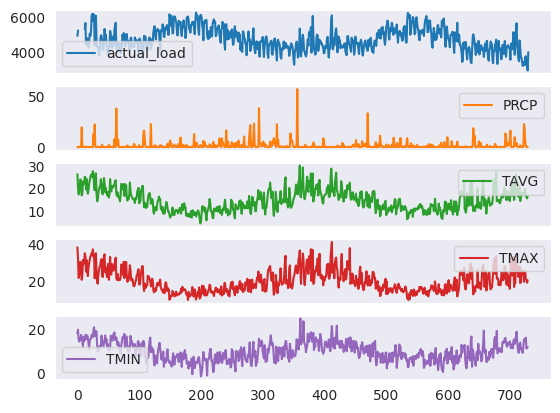

In [378]:
data_plot.plot(subplots=True)

There appears to be a negative correlation between the mean actual load and the temperatures.

In [379]:
# setting first name as index column
data_comb.set_index("time", inplace = True)
data_comb.head(2)

,actual_load,PRCP,TAVG,TMAX,TMIN
time,,,,,
2022-01-01,4949.009164,0.0,26.3,38.4,18.2
2022-01-02,5250.350000,0.0,20.9,32.6,19.9


In [380]:
#from the original datetime index create new columns with each of the year, month, day, and hour.
data_comb.loc[:,'year'] = data_comb.index.year
data_comb.loc[:,'month'] = data_comb.index.month
data_comb.loc[:,'day'] = data_comb.index.day
data_comb.loc[:,'weekday'] = data_comb.index.weekday
#data_comb.loc[:,'hours'] = data_comb.index.hour
data_comb.head(2)

,actual_load,PRCP,TAVG,TMAX,TMIN,year,month,day,weekday
time,,,,,,,,,
2022-01-01,4949.009164,0.0,26.3,38.4,18.2,2022,1,1,5
2022-01-02,5250.350000,0.0,20.9,32.6,19.9,2022,1,2,6


In [381]:
data_comb.reset_index(inplace=True)

In [382]:
data_comb.head(2)

,time,actual_load,PRCP,TAVG,TMAX,TMIN,year,month,day,weekday
0,2022-01-01,4949.009164,0.0,26.3,38.4,18.2,2022,1,1,5
1,2022-01-02,5250.350000,0.0,20.9,32.6,19.9,2022,1,2,6


In [383]:
# Convert 'weekday' column in charging_data to int32
charging_data['weekday'] = charging_data_profile['weekday'].astype('int32')

# Now you should be able to merge the DataFrames
df_merged = data_comb.merge(charging_data_profile, on='weekday', how='left')

## Car Sales Percentage increase

Rudimentary historical records on car sales can be obtained from the following link:

https://data.aaa.asn.au/ev-index/

Based on this information a simple linear increase in car sales from 2.75 to 7.99% was implemented.

More advanced technicques specific to victoria can be obtained from:
https://agdatashop.csiro.au/
EV Uptake Projections - VIC (File Download)

These will be added at a later date.


In [384]:
#Add in an annual increase in EV's in Victoria
EVS_start = 2.68
EVS_end = 7.00
df_merged["EVs"] = EVS_start + (EVS_end - EVS_start)* np.array(range(1, len(df_merged) + 1)) / len(df_merged)

# Final Feature Set

This dataset contains 11 different features.

In [385]:
#df_merged.set_index('time')
df_merged.head(2)

,time,actual_load,PRCP,TAVG,TMAX,TMIN,year,month,day,weekday,KWdelivered,EVs
0,2022-01-01,4949.009164,0.0,26.3,38.4,18.2,2022,1,1,5,0.052208,2.685910
1,2022-01-02,5250.350000,0.0,20.9,32.6,19.9,2022,1,2,6,0.000000,2.691819


# Feature engineering : Correlations between weather features and the Energy Demand

To reduce the number of select features we review the correlation between the weather and the Energy to select relevant features.

In [386]:
actual_load_correlations = data_comb.corr()['actual_load']

actual_load_correlations.sort_values(ascending=True)

,actual_load
TAVG,-0.370884
TMAX,-0.361806
weekday,-0.328398
TMIN,-0.304470
time,-0.246786
month,-0.202247
year,-0.164326
PRCP,-0.061439
day,-0.003265
actual_load,1.000000


The strongest correlation is between the actual load and TAVG,TMAX

# Predict Future Energy Demand using LSTM Model


An LSTM (Long Short-Term Memory) model is a type of recurrent neural network (RNN) architecture that is particularly well-suited for handling sequential data, such as time series, natural language, and speech. LSTMs were introduced by Sepp Hochreiter and Jürgen Schmidhuber in 1997, and they address some of the limitations of traditional RNNs by incorporating memory cells and gating mechanisms.

**LSTM Models for Time Series Forecasting**

LSTM is a type of recurrent neural network (RNN) architecture that is particularly well-suited for handling sequential data, such as time series. Unlike traditional feedforward neural networks, which don’t maintain any internal memory of past inputs, LSTMs have memory cells that allow them to capture long-term dependencies in the data.

**Parameters:**

The key parameter of an LSTM layer is the number of units (or LSTM cells).
This determines the dimensionality of the output space.

**Other important parameters include:**

**Activation functions:** The activation function for the LSTM cell (e.g., hyperbolic tangent for the main activation and sigmoid for the recurrent activation).

**Use of bias:** Whether to include bias terms in the computations.

**Initialization methods:** Techniques for initializing the weights and biases.

**Regularization: **Options for applying regularization to the weights.

**Dropout:** A regularization technique to prevent overfitting


In [371]:
features_considered = ['TMAX', 'TAVG', 'day']

In [372]:
features = df_merged[features_considered]
features.index = df_merged['time']
features.head()

,TMAX,TAVG,day
time,,,
2022-01-01,38.4,26.3,1
2022-01-02,32.6,20.9,2
2022-01-03,21.8,17.3,3
2022-01-04,22.9,19.6,4
2022-01-05,30.1,22.2,5


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

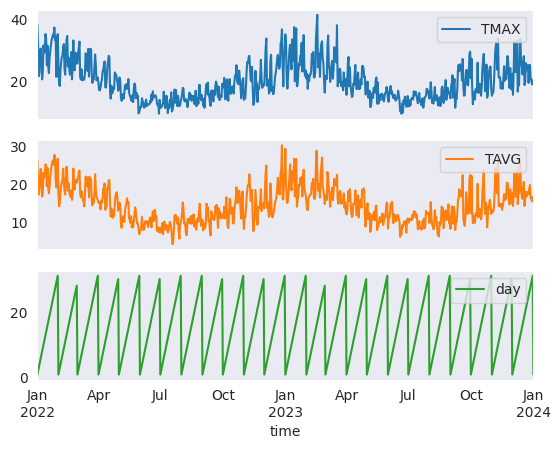

In [373]:
features.plot(subplots=True)

In [388]:
#Total Dataset samples
df_merged.shape

(731, 12)

In [389]:
#Set the number of training samples
TRAIN_SPLIT = 256

Normalize the dataset using the mean and standard deviation of the training data.

In [390]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [391]:
dataset = (dataset-data_mean)/data_std

**Multi-Step Prediction:**
In a multi-step prediction scenario, the goal is to predict not just the next value but a sequence of future values.

Given a history of past observations, the LSTM learns to generate a sequence of predictions for the future time steps.

Each predicted value becomes part of the input for predicting subsequent values.


For multi-step prediction, the output layer typically has multiple units (one for each future time step).

The model is trained to minimize the error across all predicted time steps simultaneously.

In [392]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

**Training and Evaluation**

In a time series, we have a sequence of data points ordered by time (e.g., demand, temperature readings, or other metrics).


The LSTM model takes a fixed-length window of past observations (the “history”) as input. This window can contain multiple time steps (not just the immediate past).

The LSTM is trained using historical data, and the training process involves adjusting the weights of the network to minimize the prediction error.



In [414]:
past_history = 128
future_target = 32
STEP = 4

In [415]:
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

A sample data-point is as follows

In [416]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (32, 3)

 Target temperature to predict : (32,)


Details of batch size and buffer size in a Keras LSTM model.

**Batch Size:**
The batch size refers to the number of samples processed before the model’s weights are updated during training. It plays a crucial role in how the model learns from the data.
In Keras (and other deep learning frameworks), the training process doesn’t update the model’s weights after processing each individual data point. Instead, it accumulates gradients over a batch of samples and then updates the weights based on this accumulated information.
The choice of batch size affects both the training speed and the quality of the learned model:

**Larger Batch Size:**
Pros: Faster training due to parallelization (especially on GPUs), more stable gradients, and smoother convergence.
Cons: Requires more memory, and the updates are less frequent, which might lead to suboptimal local minima.

**Smaller Batch Size:**
Pros: More frequent weight updates, which can help escape local minima and improve generalization.
Cons: Slower training due to less parallelization and noisier gradients.
In practice, you’ll often experiment with different batch sizes to find the right balance for your specific problem. Common choices include 32, 64, or 128, but it depends on your dataset and available resources12.


**Buffer Size:**
The buffer size is related to data shuffling during training. When training a neural network, it’s essential to shuffle the data to avoid any order-related biases.
The buffer size determines how many samples are randomly selected from the dataset to form a batch before shuffling. It acts as a sliding window over the data.
For example, if your dataset has 1,000 samples and your buffer size is set to 100, the first batch will contain the first 100 samples, the second batch will contain the next 100 samples, and so on.
A larger buffer size ensures better shuffling, but it also requires more memory. Smaller buffer sizes might lead to less effective shuffling.
In Keras, you can set the buffer size when creating a dataset using the shuffle method.

In [395]:
import tensorflow as tf

BATCH_SIZE = 16
BUFFER_SIZE = 32

In [396]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [397]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

In [398]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

Visualizing the history and the future data samples

In [400]:
past_history, future_target

(128, 32)

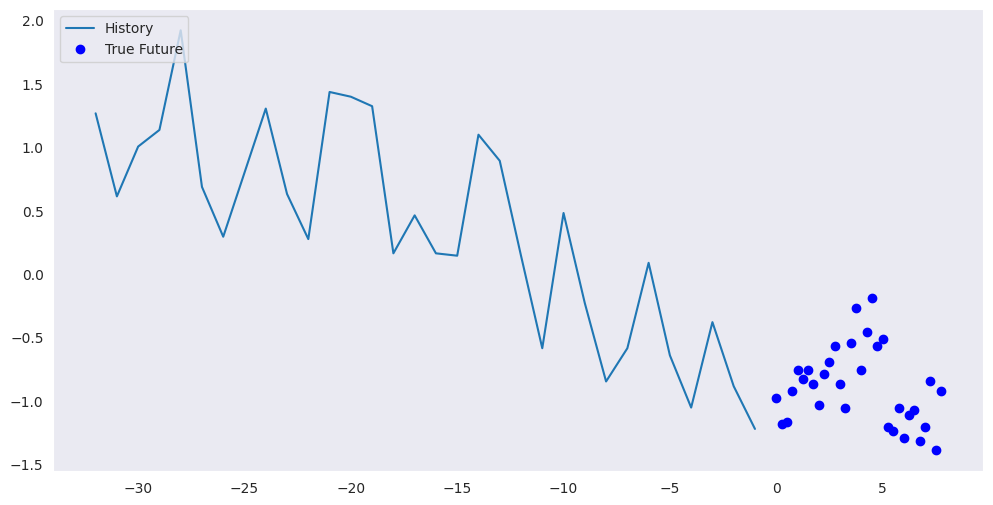

In [401]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

Model with LSTM Layers. Finally, since 'future target' predictions are made, the dense layer outputs same number of 'future target' predictions.

In [404]:
future_target

32

**Building the Model:**

In Python, you can use libraries like TensorFlow, Keras, or PyTorch to create an LSTM model.

Define your model architecture, specifying the number of LSTM layers, hidden units, activation functions, and any other relevant components.

Compile the model by specifying the loss function, optimizer, and evaluation metrics

In [405]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32, return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(future_target))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [403]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
(16, 32)


**Training The Model Process:**

Split your data into training and validation sets.
Train the model using the training data:

-Feed input sequences to the model.

-Compute the loss (difference between predicted and actual values).

-Backpropagate gradients and update model weights.

-Monitor the validation loss during training to avoid overfitting.

-You train your LSTM model by calling the fit() function (assuming you’re using a framework like Keras).

-The fit() function returns a variable called history, which contains a trace of the loss (and any other metrics) recorded at the end of each training epoch.

-By default, the loss optimized during training is called “loss,” and other metrics (like accuracy) are also tracked.

In [406]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

In [407]:
print(next(iter(train_data_multi))[0].shape)
#print(next(iter(val_data_multi))[0].shape)

(16, 32, 3)


In [408]:
# Check the shape of your training data
for data in train_data_multi.take(1):
    print(f'Shape of an element in train_data_multi: {np.array(data[0]).shape}')

Shape of an element in train_data_multi: (16, 32, 3)


In [409]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.5749 - val_loss: 0.6272
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2896 - val_loss: 0.6242
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2850 - val_loss: 0.6596
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2820 - val_loss: 0.6627
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2783 - val_loss: 0.6951
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2733 - val_loss: 0.6450
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2685 - val_loss: 0.6996
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.2648 - val_loss: 0.6768
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2620 - val_loss: 0.7211
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2597 - val_loss: 0.6770


**Training and validation loss in Long Short-Term Memory (LSTM) models.**

When training an LSTM (or any neural network), monitoring the loss is crucial. The loss function quantifies how well your model is performing on a given task. Specifically:

**Training Loss (or Training Error):**
The training loss assesses how well your model fits the training data. It represents the error between the predicted values and the actual target values during training.

As your model learns from the training data, it tries to minimize this loss by adjusting its weights and biases.

Ideally, the training loss should decrease over epochs (training iterations) as the model improves its predictions.

**Validation Loss:**
The validation loss, on the other hand, evaluates how well your model generalizes to unseen data (i.e., data it hasn’t been directly trained on).

During training, a separate validation dataset (usually a portion of your training data) is used to compute this loss.

The goal is to prevent overfitting: a situation where the model becomes too specialized to the training data and performs poorly on new examples.

A good model should have a low validation loss, indicating that it generalizes well beyond the training set.

In [284]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

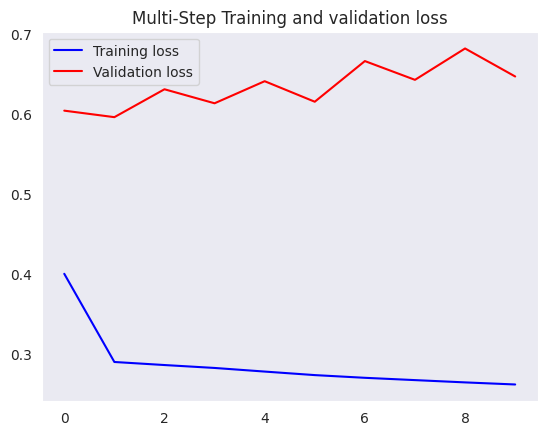

In [285]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

**Diagnosing Model Fit:**

*Underfitting:* If both training and validation losses are high, your model is likely underfitting. It hasn’t learned the underlying patterns well.

*Good Fit: *A good fit shows decreasing training and validation losses that stabilize with a minimal gap between them. The model generalizes well.

Overfitting: *italicized text* When training loss keeps decreasing, but validation loss starts increasing, your model is overfitting. It’s memorizing the training data but failing on new data.

**Making Predictions:**

Once your model is trained, you can use it to make predictions on new data.

Provide input sequences to the trained model, and it will generate predictions for the next time steps.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


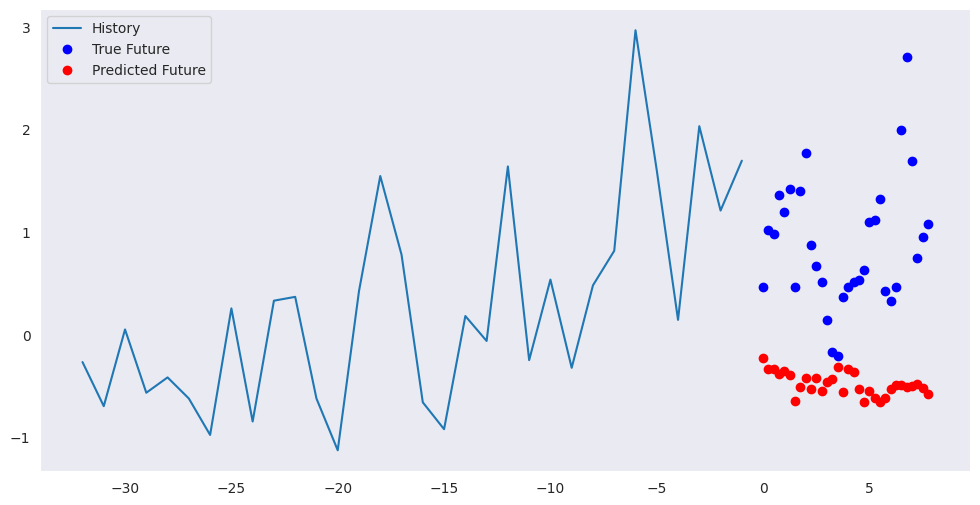

In [410]:
for x, y in val_data_multi.take(1):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

**Model Performance**

While the model predicts the coming days energy trends, it cannot predict the more random weather events and their impact on electricity Demand.

# Extending and tuning the Model further

**Extension: Electric Vehicles and Renewable Energy Supply**

EVs are becoming increasingly crucial for reducing emissions in the transportation sector. As more people adopt EVs, the demand for electricity will surge. To meet this growing demand sustainably, we need to plan for an increase in electricity supply from renewable sources

 The LSTM model can incorporate EV charging patterns and predict the additional load on the grid due to EV charging. By factoring in EV adoption rates, it can help utilities and grid operators optimize renewable energy integration

**Extension: Impact of EVs on Electricity Demand**

As EV adoption accelerates, we’ll see a corresponding increase in electricity demand. Clean energy sources like solar and wind power can play a pivotal role in meeting this demand.

The LSTM model can be trained with historical EV charging data to predict future electricity demand patterns. It can also consider seasonal variations, time of day, and regional differences.

**Extension : Battery Demand and Charging Infrastructure**

Widespread EV adoption necessitates more battery production. Batteries are not only crucial for EVs but also for grid-scale energy storage.

The LSTM model could incorporate battery production forecasts and assess the impact on overall electricity demand. Additionally, it can help optimize charging infrastructure placement by predicting high-demand areas.

**Oil Displacement and Emissions Reduction:**

As EVs replace internal combustion engine vehicles, the demand for oil will decline. This shift contributes to reducing greenhouse gas emissions.

The LSTM model can estimate the reduction in oil consumption based on EV adoption rates. It can also predict the resulting emissions reduction, considering both tailpipe emissions and the cleaner energy mix.

**Extension : Scenarios for EV Deployment:**

The International Energy Agency (IEA) has developed various scenarios for EV deployment. These scenarios consider factors like government policies, technological advancements, and consumer preferences.

The LSTM model can simulate different scenarios, incorporating these factors. It can help policymakers and industry stakeholders make informed decisions about EV infrastructure investments and energy planning.